In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def getParafast(model,para): #para is the dataframe 'data_key_para.csv' this is a fast method
    para = para.loc[para['Model'] == model]
    parameters=[]
    parameters.append(para['Group'].values.tolist()[0])
    parameters.append(para['k1'].values.tolist()[0])
    parameters.append(para['k2'].values.tolist()[0])
    parameters.append(para['k3'].values.tolist()[0])
    parameters.append(para['k4'].values.tolist()[0])
    parameters.append(para['k5'].values.tolist()[0])
    parameters.append(para['k6'].values.tolist()[0])
    parameters.append(para['k7'].values.tolist()[0])
    parameters.append(para['k8'].values.tolist()[0])
    parameters.append(para['k9'].values.tolist()[0])
    parameters.append(para['P_el_n [W]'].values.tolist()[0])
    parameters.append(para['P_th_max [W]'].values.tolist()[0])
    return parameters
def getParaeasy(model): #only with model name you get the data needed for fit. Takes a bit longer
    para = pd.read_csv('data_key_para.csv', delimiter=',')
    para = para.loc[para['Model'] == model]
    parameters=[]
    parameters.append(para['Group'].values.tolist()[0])
    parameters.append(para['k1'].values.tolist()[0])
    parameters.append(para['k2'].values.tolist()[0])
    parameters.append(para['k3'].values.tolist()[0])
    parameters.append(para['k4'].values.tolist()[0])
    parameters.append(para['k5'].values.tolist()[0])
    parameters.append(para['k6'].values.tolist()[0])
    parameters.append(para['k7'].values.tolist()[0])
    parameters.append(para['k8'].values.tolist()[0])
    parameters.append(para['k9'].values.tolist()[0])
    parameters.append(para['P_el_n [W]'].values.tolist()[0])
    parameters.append(para['P_th_max [W]'].values.tolist()[0])
    return parameters
def getPowerHP(x,y,parameter): #input is: x -> input temperature
                                        # y -> outflow temperature
                                        #parameter -> list from getpara(easy/fast)
    Group=parameter[0]
    k4=parameter[4]
    k5=parameter[5]
    k6=parameter[6]
    k7=parameter[7]
    k8=parameter[8]
    k9=parameter[9]
    Pel_n=parameter[10]
    Pth_max=parameter[11]
    PSUP=0
    if Group==(1 or 2 or 3):
        if x>=5: #minimum electrical Power at 5°C
            x=5
        Pel=(k4*x+k5*y+k6)*Pel_n
        if((Pel/Pel_n)<(0.15)):
            Pel=Pel_n*0.15
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
        if COP<=1:
            COP=1
            Pel=0
            PSUP=Pth_max
            Pth=Pth_max
    elif Group==(4 or 5 or 6):
        Pel=(k4*x+k5*y+k6)*Pel_n
        if((Pel/Pel_n)<(0.15)):
            Pel=Pel_n*0.15
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
        if COP<=1:
            COP=1
            Pel=0
            PSUP=Pth_max
            Pth=Pth_max
    else:
        Pel=(k4*x+k5*y+k6)*Pel_n
        if((Pel/Pel_n)<(0.15)):
            Pel=Pel_n*0.15
        COP=k7*x+k8*y+k9
        Pth=Pel*COP
        if COP<=1:
            COP=1
            Pel=0
            PSUP=Pth_max
            Pth=Pth_max
    return Pth,Pel,PSUP,COP

In [3]:
tin=-20
tout=55
getPowerHP(tin,tout,getParaeasy('LW 101'))
#return: Pth, Pel, Psup, COP

(6980, 0, 6980, 1)

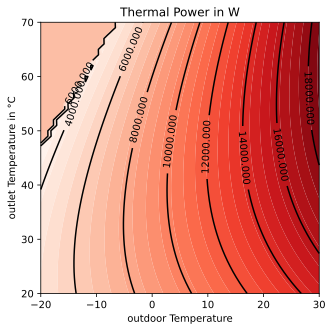

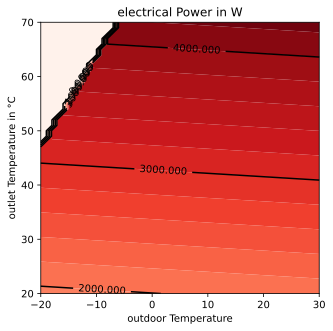

In [56]:
T_low=[*range(-20,31,1)]#inflow TEMP
T_high=[*range(20,71,1)]#outflow TEMP
Tin=[]
Tout=[]
Pth_keyfit=[]
Pel_keyfit=[]
parameter=getParaeasy('LW 101')#LW 101 MHC-V16W/D2RN8-B**** 
for x in T_low:
    for y in T_high:
        p_th = getPowerHP(x,y,parameter)[0]
        p_el = getPowerHP(x,y,parameter)[1]
        Tin.append(x)
        Tout.append(y)
        Pth_keyfit.append(p_th)
        Pel_keyfit.append(p_el)
#create Dataframe for plotting        
heatingPower=pd.DataFrame()
heatingPower['Tin']=Tin
Tin1=Tin
Tout1=Tout
heatingPower['Tout']=Tout
heatingPower['Pth']=Pth_keyfit

Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pth').T.values
Tin_unique = np.sort(heatingPower.Tin.unique())
Tout_unique = np.sort(heatingPower.Tout.unique())
Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)
        
set_matplotlib_formats('svg')
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)
# Define levels in z-axis where we want lines to appear
levels = np.array([*range(-10000,50000,2000)])
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)
# Set all level lines to black
line_colors = ['black' for l in cpf.levels]
# Make plot and customize axes
cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_title('Thermal Power in W')
ax.set_xlabel('outdoor Temperature')
_ = ax.set_ylabel('outlet Temperature in °C')
plt.show()
#create Dataframe for plotting        
heatingPower=pd.DataFrame()
heatingPower['Tin']=Tin1
heatingPower['Tout']=Tout1
heatingPower['Pel']=Pel_keyfit
Z = heatingPower.pivot_table(index='Tin', columns='Tout', values='Pel').T.values
Tin_unique = np.sort(heatingPower.Tin.unique())
Tout_unique = np.sort(heatingPower.Tout.unique())
Tin, Tout = np.meshgrid(Tin_unique, Tout_unique)      
set_matplotlib_formats('svg')
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)
# Define levels in z-axis where we want lines to appear
levels = np.array([*range(-1000,20000,1000)])
# Generate a color mapping of the levels we've specified
cpf = ax.contourf(Tin,Tout,Z, len(levels), cmap=cm.Reds)
# Set all level lines to black
line_colors = ['black' for l in cpf.levels]
# Make plot and customize axes
cp = ax.contour(Tin, Tout, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_title('electrical Power in W')
ax.set_xlabel('outdoor Temperature')
_ = ax.set_ylabel('outlet Temperature in °C')
plt.show()

In [16]:
data_key = pd.read_csv('data_key_para.csv', delimiter=',')
group=5
data_key=data_key.loc[data_key['Group']==group]
Models=data_key['Model'].values.tolist()
Models = list(dict.fromkeys(Models))

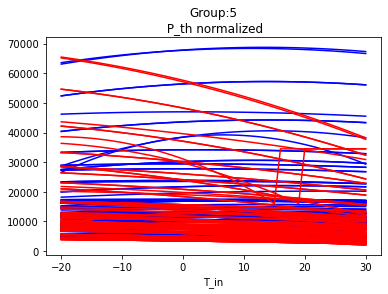

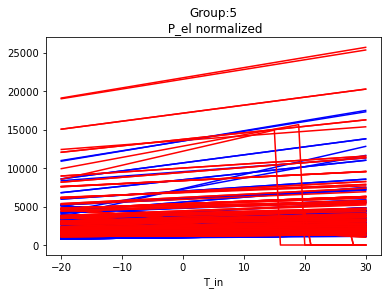

In [17]:
T_in=[*range(-20,31,1)]#inflow TEMP
T_out=[30,50]
paradf = pd.read_csv('data_key_para.csv', delimiter=',')
paradf=paradf.loc[paradf['Group']==group]
P_th_low_g=pd.DataFrame()
P_th_low_g['T_in']=T_in
P_th_high_g=pd.DataFrame()
P_th_high_g['T_in']=T_in
P_el_low_g=pd.DataFrame()
P_el_low_g['T_in']=T_in
P_el_high_g=pd.DataFrame()
P_el_high_g['T_in']=T_in

for model in Models:
    P_th_low=[]
    P_th_high=[]
    P_el_low=[]
    P_el_high=[]
    para=getParafast(model,paradf)
    for tin in T_in:
        p_th_low=getPowerHP(tin,T_out[0],para)[0]
        p_th_high=getPowerHP(tin,T_out[1],para)[0]
        p_el_low=getPowerHP(tin,T_out[0],para)[1]
        p_el_high=getPowerHP(tin,T_out[1],para)[1]
        P_th_low.append(p_th_low)
        P_th_high.append(p_th_high)
        P_el_low.append(p_el_low)
        P_el_high.append(p_el_high)
    P_th_low_g[model]=P_th_low
    P_th_high_g[model]=P_th_high
    P_el_low_g[model]=P_el_low
    P_el_high_g[model]=P_el_high
#Plot: thermal power
fig, axes = plt.subplots(nrows=1, ncols=1)
variable=str(group)
P_th_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_th normalized', legend=False)
P_th_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
plt.show()

#Plot: electric Power
fig, axes = plt.subplots(nrows=1, ncols=1)
P_el_low_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Blue', title='Group:' + variable + '\n P_el normalized', legend=False)
P_el_high_g.plot(ax=axes, x='T_in', y=Models, kind='line', c='Red', legend=False)
plt.show()